In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [3]:
initial_data = yf.download("WDAY ^VIX", start="2020-10-01", end="2021-10-01")

[*********************100%***********************]  2 of 2 completed


In [4]:
initial_data.head()

Adj Close                  Close                   High  \
                  WDAY       ^VIX        WDAY       ^VIX        WDAY   
Date                                                                   
2020-09-30  215.130005  26.370001  215.130005  26.370001  222.500000   
2020-10-01  220.520004  26.700001  220.520004  26.700001  222.750000   
2020-10-02  218.979996  27.629999  218.979996  27.629999  225.550003   
2020-10-05  222.039993  27.959999  222.039993  27.959999  224.580002   
2020-10-06  217.009995  29.480000  217.009995  29.480000  225.690002   

                              Low                   Open              Volume  \
                 ^VIX        WDAY       ^VIX        WDAY       ^VIX     WDAY   
Date                                                                           
2020-09-30  27.120001  214.000000  25.059999  220.520004  26.690001  2123400   
2020-10-01  27.110001  216.699997  25.330000  222.750000  25.780001  2389800   
2020-10-02  29.900000  218.000000  26.930000  219.289993  28.870001  1680400   
2020-10-05  29.690001  217.580002  27.270000  219.669998  29.520000  1309400   
2020-10-06  30.000000  215.720001  26.010000  223.179993  28.049999  1463200   

                 
           ^VIX  
Date             
2020-09-30    0  
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0

In [5]:
initial_data['Adj Close'].head()

,WDAY,^VIX
Date,,
2020-09-30,215.130005,26.370001
2020-10-01,220.520004,26.700001
2020-10-02,218.979996,27.629999
2020-10-05,222.039993,27.959999
2020-10-06,217.009995,29.480000


In [6]:
data = initial_data['Adj Close']
wday = data['WDAY']
vix = data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-30 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WDAY    253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [8]:
data.head(10)

,WDAY,^VIX
Date,,
2020-09-30,215.130005,26.370001
2020-10-01,220.520004,26.700001
2020-10-02,218.979996,27.629999
2020-10-05,222.039993,27.959999
2020-10-06,217.009995,29.480000
2020-10-07,227.210007,28.059999
2020-10-08,224.039993,26.360001
2020-10-09,225.729996,25.000000
2020-10-12,228.190002,25.070000


In [9]:
data.tail(10)

,WDAY,^VIX
Date,,
2021-09-17,268.510010,20.809999
2021-09-20,267.190002,25.709999
2021-09-21,270.179993,24.360001
2021-09-22,270.709991,20.870001
2021-09-23,270.070007,18.629999
2021-09-24,268.429993,17.750000
2021-09-27,263.779999,18.760000
2021-09-28,252.369995,23.250000
2021-09-29,249.509995,22.559999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

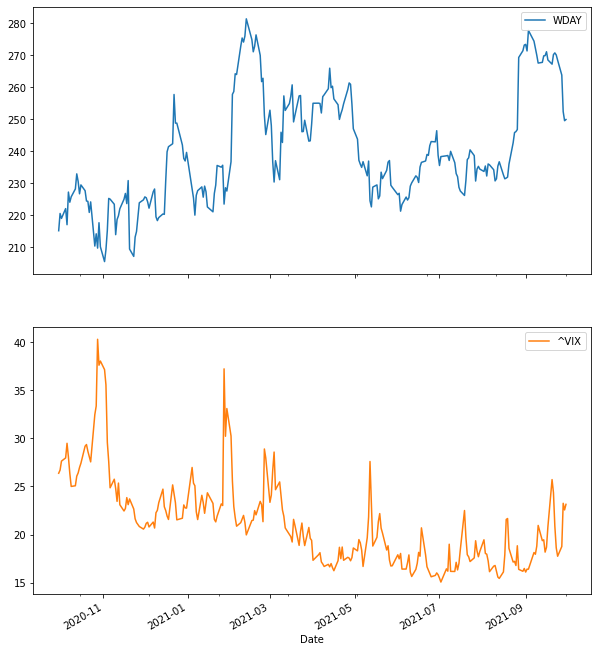

In [10]:
data.plot(figsize=(10,12), subplots=True)

In [22]:
data.pct_change().round(4).head()

,WDAY,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.0251,0.0125
2020-10-02,-0.0070,0.0348
2020-10-05,0.0140,0.0119
2020-10-06,-0.0227,0.0544


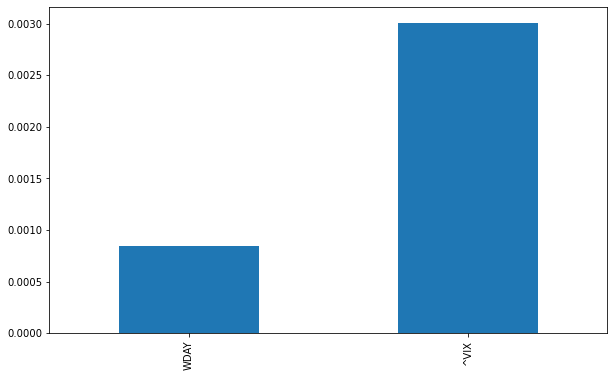

In [23]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [20]:
log_return = np.log(wday / wday.shift(1))


In [13]:
vix= vix[-1]
print('The market volatility is', round(vix,2),'%')

The market volatility is 23.14 %


In [14]:
data.describe()

,WDAY,^VIX
count,253.000000,253.000000
mean,239.771106,21.288577
std,17.262519,4.623441
min,205.479996,15.070000
25%,226.789993,17.690001
50%,235.949997,20.790001
75%,252.369995,23.250000
max,281.359985,40.279999


Rolling Statistics

In [25]:
sym = 'WDAY'
WDAY_data = pd.DataFrame(data[sym]).dropna()
WDAY_data.tail()

,WDAY
Date,
2021-09-24,268.429993
2021-09-27,263.779999
2021-09-28,252.369995
2021-09-29,249.509995
2021-09-30,249.889999


In [26]:
window = 10
WDAY_data['min'] = data[sym].rolling(window=window).min()
WDAY_data['mean'] = data[sym].rolling(window=window).mean()
WDAY_data['std'] = data[sym].rolling(window=window).std()
WDAY_data['median'] = data[sym].rolling(window=window).median()
WDAY_data['max'] = data[sym].rolling(window=window).max()
WDAY_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
WDAY_data.dropna().head()

,WDAY,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-13,232.899994,215.130005,223.174998,5.496947,223.039993,232.899994,231.545821
2020-10-14,230.539993,217.009995,224.715997,5.139415,224.884995,232.899994,230.791450
2020-10-15,226.669998,217.009995,225.330997,4.945837,226.199997,232.899994,227.700361
2020-10-16,229.449997,217.009995,226.377997,4.543868,226.940002,232.899994,229.012588
2020-10-19,227.639999,217.009995,226.937997,4.287695,227.425003,232.899994,227.983147


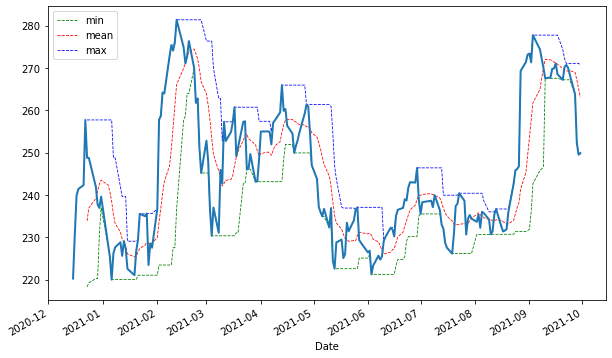

In [216]:
ax = WDAY_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'b--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [28]:
WDAY_data['SMA1'] = data[sym].rolling(window=20).mean()
WDAY_data['SMA2'] = data[sym].rolling(window=60).mean()
WDAY_data[[sym, 'SMA1', 'SMA2']].tail()

,WDAY,SMA1,SMA2
Date,,,
2021-09-24,268.429993,270.6940,247.190499
2021-09-27,263.779999,270.4190,247.661666
2021-09-28,252.369995,269.4690,247.896166
2021-09-29,249.509995,268.2865,248.078832
2021-09-30,249.889999,267.1125,248.266166


<AxesSubplot:xlabel='Date'>

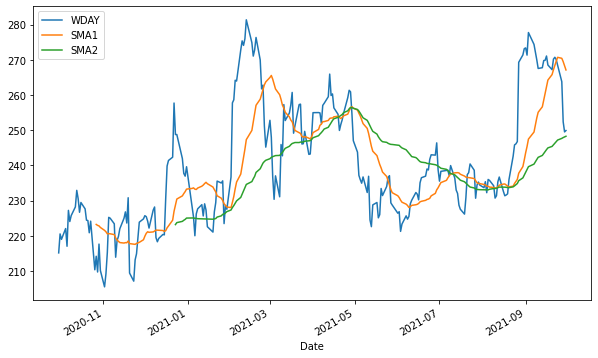

In [29]:
WDAY_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

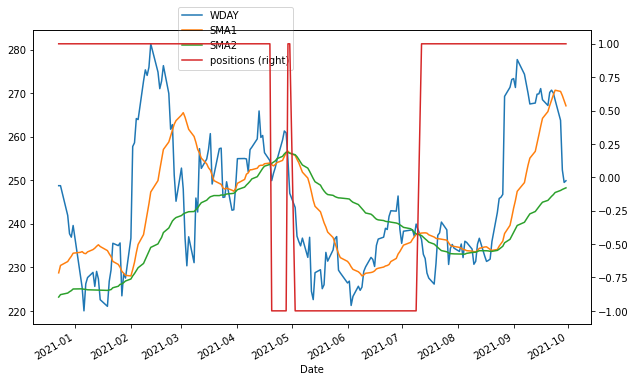

In [30]:
WDAY_data.dropna(inplace=True)
WDAY_data['positions'] = np.where(WDAY_data['SMA1'] > WDAY_data['SMA2'],1,-1)
ax = WDAY_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Correlation Analysis

In [190]:
Corr_data = data[['WDAY', '^VIX']].dropna()
Corr_data.tail()

,WDAY,^VIX
Date,,
2021-09-24,268.429993,17.750000
2021-09-27,263.779999,18.760000
2021-09-28,252.369995,23.250000
2021-09-29,249.509995,22.559999
2021-09-30,249.889999,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

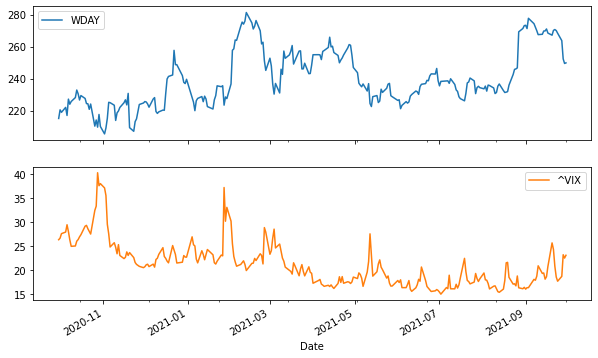

In [191]:
Corr_data.plot(subplots=True, figsize=(10, 6))

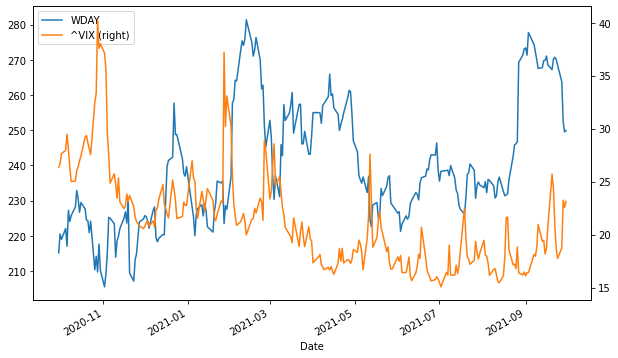

In [192]:
Corr_data.loc['2020-01-01':].plot(secondary_y='^VIX', figsize=(10, 6));

Logarithmic Returns

In [193]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,WDAY,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,0.024746,0.012437
2020-10-02,-0.007008,0.034239
2020-10-05,0.013877,0.011873
2020-10-06,-0.022914,0.052937


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

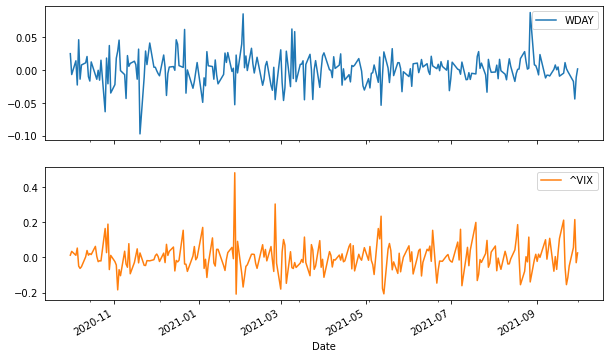

In [194]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='WDAY', ylabel='WDAY'>,
        <AxesSubplot:xlabel='^VIX', ylabel='WDAY'>],
       [<AxesSubplot:xlabel='WDAY', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

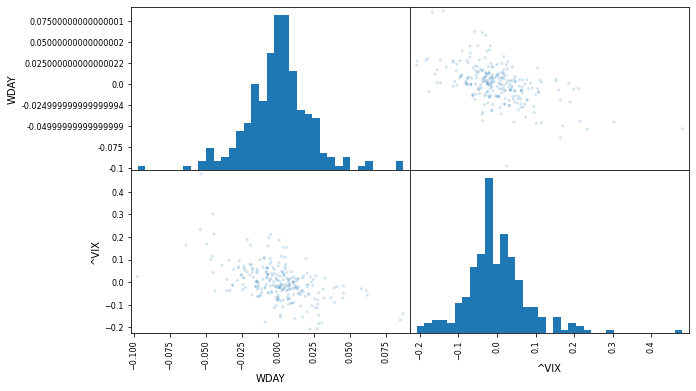

In [195]:
pd.plotting.scatter_matrix(sprets, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

OLS Regression

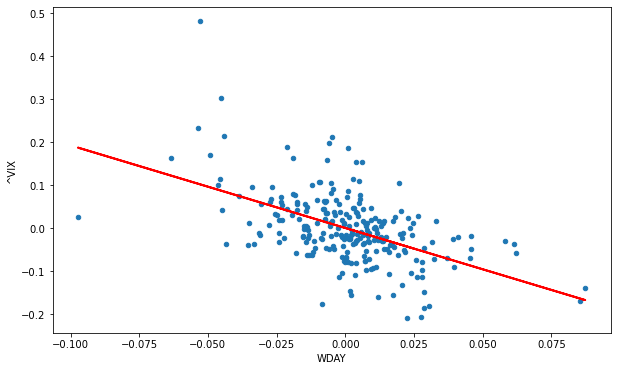

In [196]:
reg = np.polyfit(sprets['WDAY'], sprets['^VIX'], deg=1)
ax = sprets.plot(kind='scatter', x='WDAY', y='^VIX', figsize=(10, 6))
ax.plot(sprets['WDAY'], np.polyval(reg, sprets['WDAY']), 'r', lw=2);

Correlation

In [197]:
sprets.corr()

,WDAY,^VIX
WDAY,1.000000,-0.517955
^VIX,-0.517955,1.000000


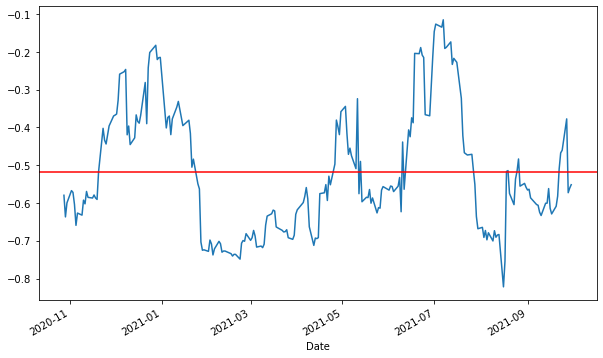

In [198]:
ax = sprets['WDAY'].rolling(window=20).corr(sprets['^VIX']).plot(figsize=(10, 6)) 
ax.axhline(sprets.corr().iloc[0, 1], c='r');


# Binomial tree

In [32]:
wday[-1]

249.88999938964844

In [46]:
S0 = wday[-1]              # spot stock price
K =   255            # strike
T = 1.0               # maturity 
r = 0.01357               # risk free rate 
sig = 0.2314              # diffusion coefficient or volatility
N = 3                 # number of periods or number of time steps  
payoff = "call"          # payoff 

In [68]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [69]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [65]:
S

array([[249.88999939, 248.81421259, 249.52229591, ..., 291.38292805,
        292.56274409, 292.92247197],
       [249.88999939, 249.08351405, 247.51367646, ..., 211.11597003,
        210.88355284, 209.83421627],
       [249.88999939, 249.26214491, 250.04502511, ..., 196.65213215,
        197.25845549, 197.53338476],
       ...,
       [249.88999939, 250.39073579, 250.58335947, ..., 340.7896349 ,
        341.69299644, 341.33890565],
       [249.88999939, 249.9880245 , 250.3859045 , ..., 208.4896932 ,
        208.9050248 , 208.32404439],
       [249.88999939, 249.86065857, 250.12259991, ..., 213.71775662,
        214.76890335, 215.8188891 ]])

In [70]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.48356664144909456

option value at each final node

In [71]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        , 118.08914117],
       [  0.        ,   0.        ,   0.        ,  30.60783709],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

option value at earlier nodes

In [72]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 24.11227537,  42.51460119,  72.58182207, 118.08914117],
       [  0.        ,   7.0927784 ,  14.73413064,  30.60783709],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [73]:
print('European ' + payoff, str( V[0,0]))

European call 24.112275373024183


Monte Carlo Simulation

In [53]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [54]:
T = 1
r = 0.01357
sigma = 0.2314
S0 = wday[-1]
K = 255

In [55]:
S = mcs_simulation_np(10000)

In [56]:
S = np.transpose(S)
S

array([[249.88999939, 248.81421259, 249.52229591, ..., 291.38292805,
        292.56274409, 292.92247197],
       [249.88999939, 249.08351405, 247.51367646, ..., 211.11597003,
        210.88355284, 209.83421627],
       [249.88999939, 249.26214491, 250.04502511, ..., 196.65213215,
        197.25845549, 197.53338476],
       ...,
       [249.88999939, 250.39073579, 250.58335947, ..., 340.7896349 ,
        341.69299644, 341.33890565],
       [249.88999939, 249.9880245 , 250.3859045 , ..., 208.4896932 ,
        208.9050248 , 208.32404439],
       [249.88999939, 249.86065857, 250.12259991, ..., 213.71775662,
        214.76890335, 215.8188891 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

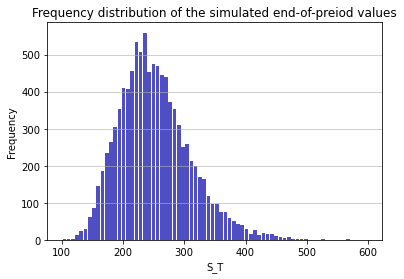

In [45]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [74]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 30.997024899575763


In [75]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 37.17424456522767


Black-Scholes Model

In [80]:
import scipy.stats as si

In [81]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [83]:
euro_option_bsm(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

22.26738891038248

In [242]:
euro_option_bsm(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

23.94041215382778

In [245]:
S = np.linspace(50,250,51)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i],255, 1, 0.01357, 0, 0.2314, 'call')
    Put [i] = euro_option_bsm(S[i], 255, 1, 0.01357, 0, 0.2314, 'put')

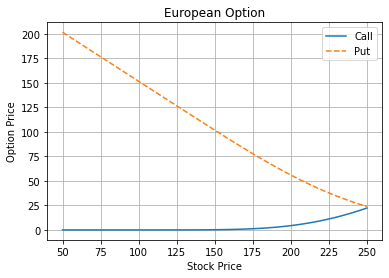

In [246]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call','Put'])

# Greeks

Delta

In [87]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [89]:
delta(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

0.5346100615999247

In [90]:
delta(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

-0.46538993840007525

In [173]:
S = np.linspace(50, 250, 51)
T = np.linspace(0, 1, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 255, 1, 0.01357, 0, 0.2314, 'call')

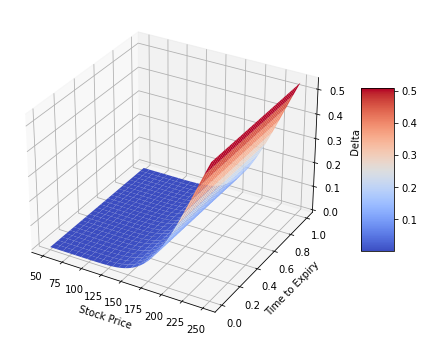

In [174]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [98]:
d = delta(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5346 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5346 .


2D Graph

In [217]:
S = np.linspace(50,250,51)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 255, 1, 0.01357, 0, 0.2314, 'call')
    Delta_Put [i] = delta(S[i], 255, 1, 0.01357, 0, 0.2314, 'put')

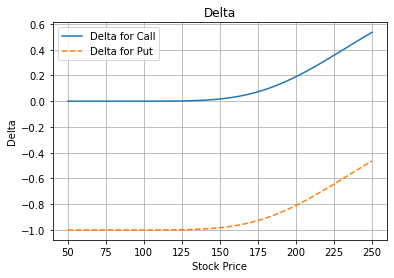

In [218]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

Gamma

In [178]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [199]:
gamma(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

0.006780567108342061

In [201]:
gamma(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

0.006780567108342061

In [179]:
S = np.linspace(50, 250, 51)
T = np.linspace(0, 1, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 255, 1, 0.01357, 0, 0.2314, 'call')

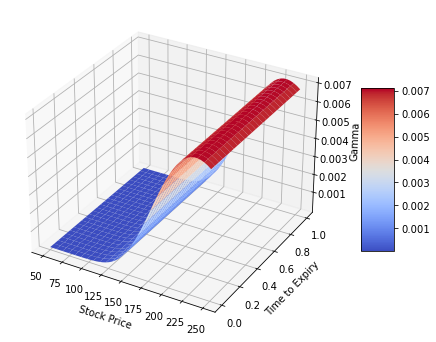

In [180]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [223]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 255, 1, 0.01357, 0, 0.2314, 'call')
    Gamma [i] = gamma(S[i], 255, 1, 0.01357, 0, 0.2314, 'put')
 

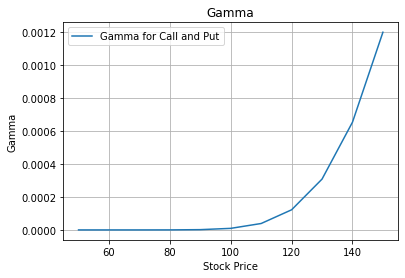

In [224]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

Speed

In [181]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [202]:
speed(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

-3.7829816243247254e-05

In [204]:
speed(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

-3.7829816243247254e-05

In [182]:
S = np.linspace(50, 250, 51)
T = np.linspace(0, 1, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 255, 1, 0.01357, 0, 0.2314, 'call')

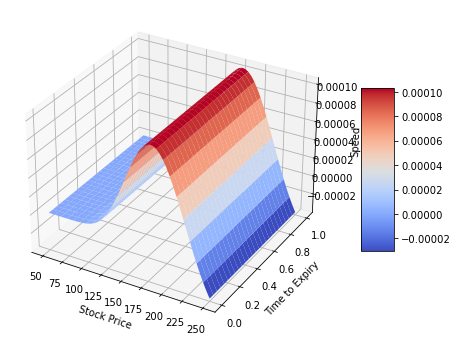

In [183]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [226]:
S = np.linspace(50,250,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 255, 1, 0.01357, 0, 0.2314, 'call')

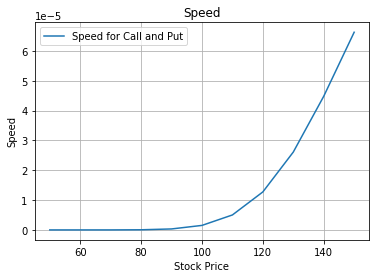

In [227]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

Theta

In [184]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [205]:
theta(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

13.001593256465334

In [210]:
theta(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

13.393907174402392

In [185]:
S = np.linspace(50, 250, 51)
T = np.linspace(0, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 255, 1, 0.01357, 0, 0.2314, 'call')

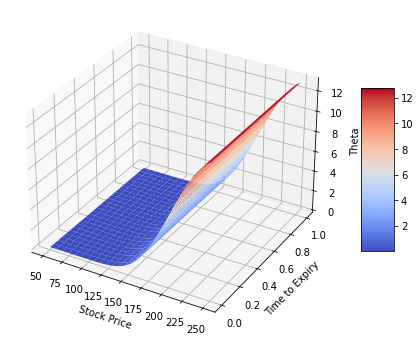

In [186]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [232]:
T = np.linspace(50,250,51)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')
    Theta_Put [i] = theta(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

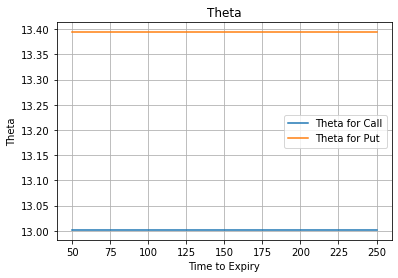

In [233]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

Rho

In [187]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [214]:
rho(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

111.32631905652262

In [215]:
rho(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

-140.2367035765711

In [188]:
S = np.linspace(50, 250, 51)
T = np.linspace(0, 1, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 255, 1, 0.01357, 0, 0.2314, 'call')

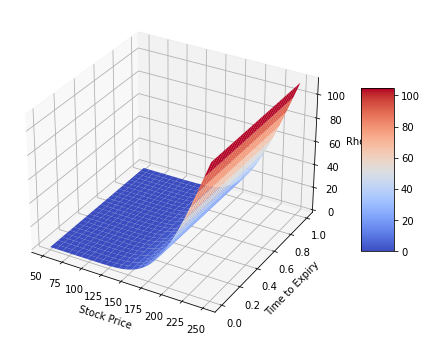

In [189]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [235]:
r = np.linspace(50,250,51)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(wday[-1],255, 1, 0.01357, 0, 0.2314, 'call')
    Rho_Put [i] = rho(wday[-1],255, 1, 0.01357, 0, 0.2314, 'put')

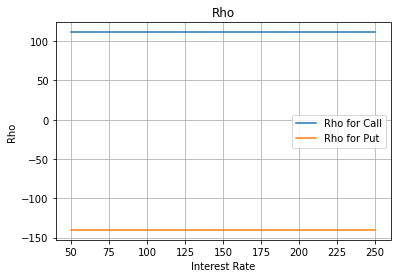

In [236]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

Vega

In [168]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [211]:
vega(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

99.3162930584989

In [213]:
vega(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'put')

99.3162930584989

In [169]:
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 255, 1, 0.01357, 0, 0.2314, 'call')

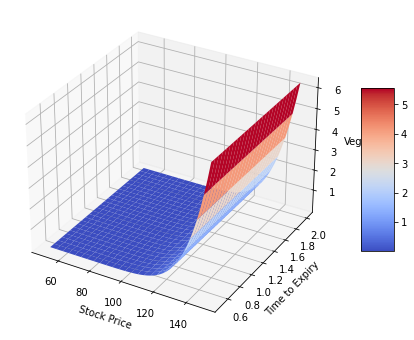

In [170]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [171]:
v = vega(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 99.3163 . If the volatility increases 1%, then the value of the option will increase $ 0.993163 .


In [237]:
vol = np.linspace(50,250,51)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(wday[-1], 255, 1, 0.01357, 0, 0.2314, 'call')

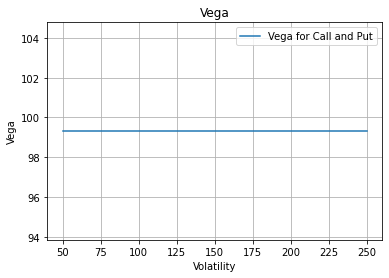

In [238]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])